Data Science Project: MONIKA PATIAL

Customer churn is an important metric that every business wants to keep an eye on for making profitable decisions. It's important because it is difficult and expensive to acquire new customers than to retain existing customers. I have used the "Telco Customer Churn" data from Kaggle to build a churn prediction model(using **Random Forest Model** and **Neural Network** using **TensorFlow**). We will start with understanding the data features, missing values, etc.

In [1]:
# Importing libraries:
import pandas as pd
import numpy as np

# Data Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Reading data
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Data Understanding

A quick look at the dataset to see how it looks like

In [2]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Data information

In [3]:
data.info()
print("DATA Shape:",data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataset contains the information of 7043 customers churn. Everything looks good except TotalCharges which should be float64 type. (Point noted!)

####  Looking at Missing Values

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in the dataset.

####  Looking at the unique values in the dataset

In [5]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
# droping customerID won't lose any information about churn
data = data.drop("customerID", axis = 'columns')

#### Let's look at the distinct values and types

In [7]:
for column in data:
    print(f'{column}({data[column].dtypes}): {data[column].unique()}')

gender(object): ['Female' 'Male']
SeniorCitizen(int64): [0 1]
Partner(object): ['Yes' 'No']
Dependents(object): ['No' 'Yes']
tenure(int64): [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService(object): ['No' 'Yes']
MultipleLines(object): ['No phone service' 'No' 'Yes']
InternetService(object): ['DSL' 'Fiber optic' 'No']
OnlineSecurity(object): ['No' 'Yes' 'No internet service']
OnlineBackup(object): ['Yes' 'No' 'No internet service']
DeviceProtection(object): ['No' 'Yes' 'No internet service']
TechSupport(object): ['No' 'Yes' 'No internet service']
StreamingTV(object): ['No' 'Yes' 'No internet service']
StreamingMovies(object): ['No' 'Yes' 'No internet service']
Contract(object): ['Month-to-month' 'One year' 'Two year']
PaperlessBilling(object): ['Yes' 'No']
PaymentMethod(object): ['Electronic check' 'Mai

Some of the labels can be merged like "No internet service": No, "No phone service": No.

In [8]:
# MultipleLines, OnlineSecurity, OnlineBackup, 
# DeviceProtection, TechSupport, StreamingTV, StreamingMovies

data.replace('No phone service','No',inplace = True)
data.replace('No internet service','No',inplace = True)

In [9]:
# As noted, Totalcharges needs correction
data[pd.to_numeric(data.TotalCharges,errors='coerce').isnull()]
# Dropping blank spaces in the Total Columns since they corresponds to 0.15% of the total dataset
data = data[data.TotalCharges!=' ']
# Since TotalCharges types are object
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
# Checking Null values in the TotalCharges
data.TotalCharges.isnull().sum()

0

In [10]:
# Let's look at the distinct values and types again
for column in data:
    print(f'{column}({data[column].dtypes}): {data[column].unique()}')

gender(object): ['Female' 'Male']
SeniorCitizen(int64): [0 1]
Partner(object): ['Yes' 'No']
Dependents(object): ['No' 'Yes']
tenure(int64): [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService(object): ['No' 'Yes']
MultipleLines(object): ['No' 'Yes']
InternetService(object): ['DSL' 'Fiber optic' 'No']
OnlineSecurity(object): ['No' 'Yes']
OnlineBackup(object): ['Yes' 'No']
DeviceProtection(object): ['No' 'Yes']
TechSupport(object): ['No' 'Yes']
StreamingTV(object): ['No' 'Yes']
StreamingMovies(object): ['No' 'Yes']
Contract(object): ['Month-to-month' 'One year' 'Two year']
PaperlessBilling(object): ['Yes' 'No']
PaymentMethod(object): ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges(float64): [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges(float64)

## Data visualization

#### Visualizing the behaviour of numerical features for churn

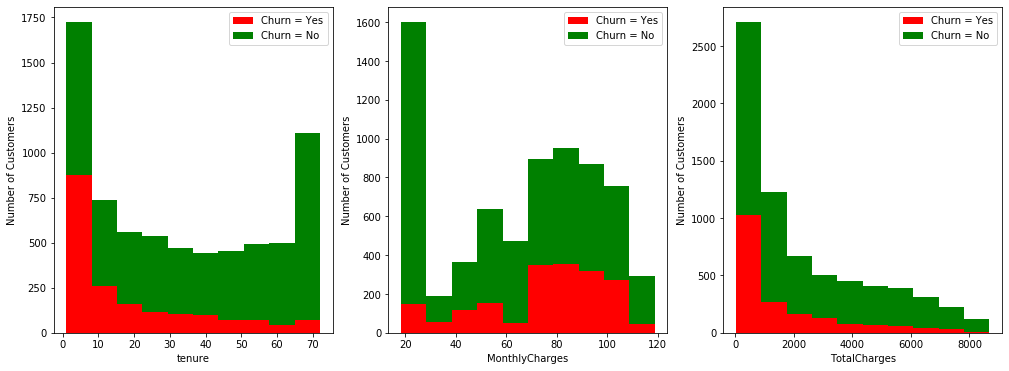

In [11]:
# tenure', 'MonthlyCharges', 'TotalCharges' for churn
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig , ax = plt.subplots(1,3,figsize=(17,6))
for i , x in enumerate(features):
    ax[i].hist(x = [data[data['Churn']=='Yes'][x],data[data['Churn']=='No'][x]], 
                 stacked=True, color = ['r','g'],
               label = ['Churn = Yes','Churn = No'], bins=10)
    ax[i].set(xlabel=x,ylabel='Number of Customers')
    ax[i].legend()

Long-term tenured customers are less likely to churn, paying less total charges prefer to leave contract.

In [12]:
#Converting SeniorCitizen feature to Categorical variable for visualization
data.SeniorCitizen= data.SeniorCitizen.map({0:'No', 1:'Yes'})

#### Total Customer Churn (in Percentage)

In [13]:
round(data[data.Churn == 'Yes']['Churn'].count()/data['Churn'].count() * 100, 2)

26.58

26.58% of Telco Customers leave the service and need some kind of retention measures. Our task is to identify such customers based on given data.

In [14]:
# Contracting long names to fit on axis such as 'Bank transfer (automatic)':Bank transfer A
data.PaymentMethod = data.PaymentMethod.map({
    'Bank transfer (automatic)':'Bank transfer A',
    'Credit card (automatic)':'Credit card A',
    'Mailed check':'Mailed check',
    'Electronic check':'Electronic check'})

#### Visualizing the behaviour of categorical features for churn

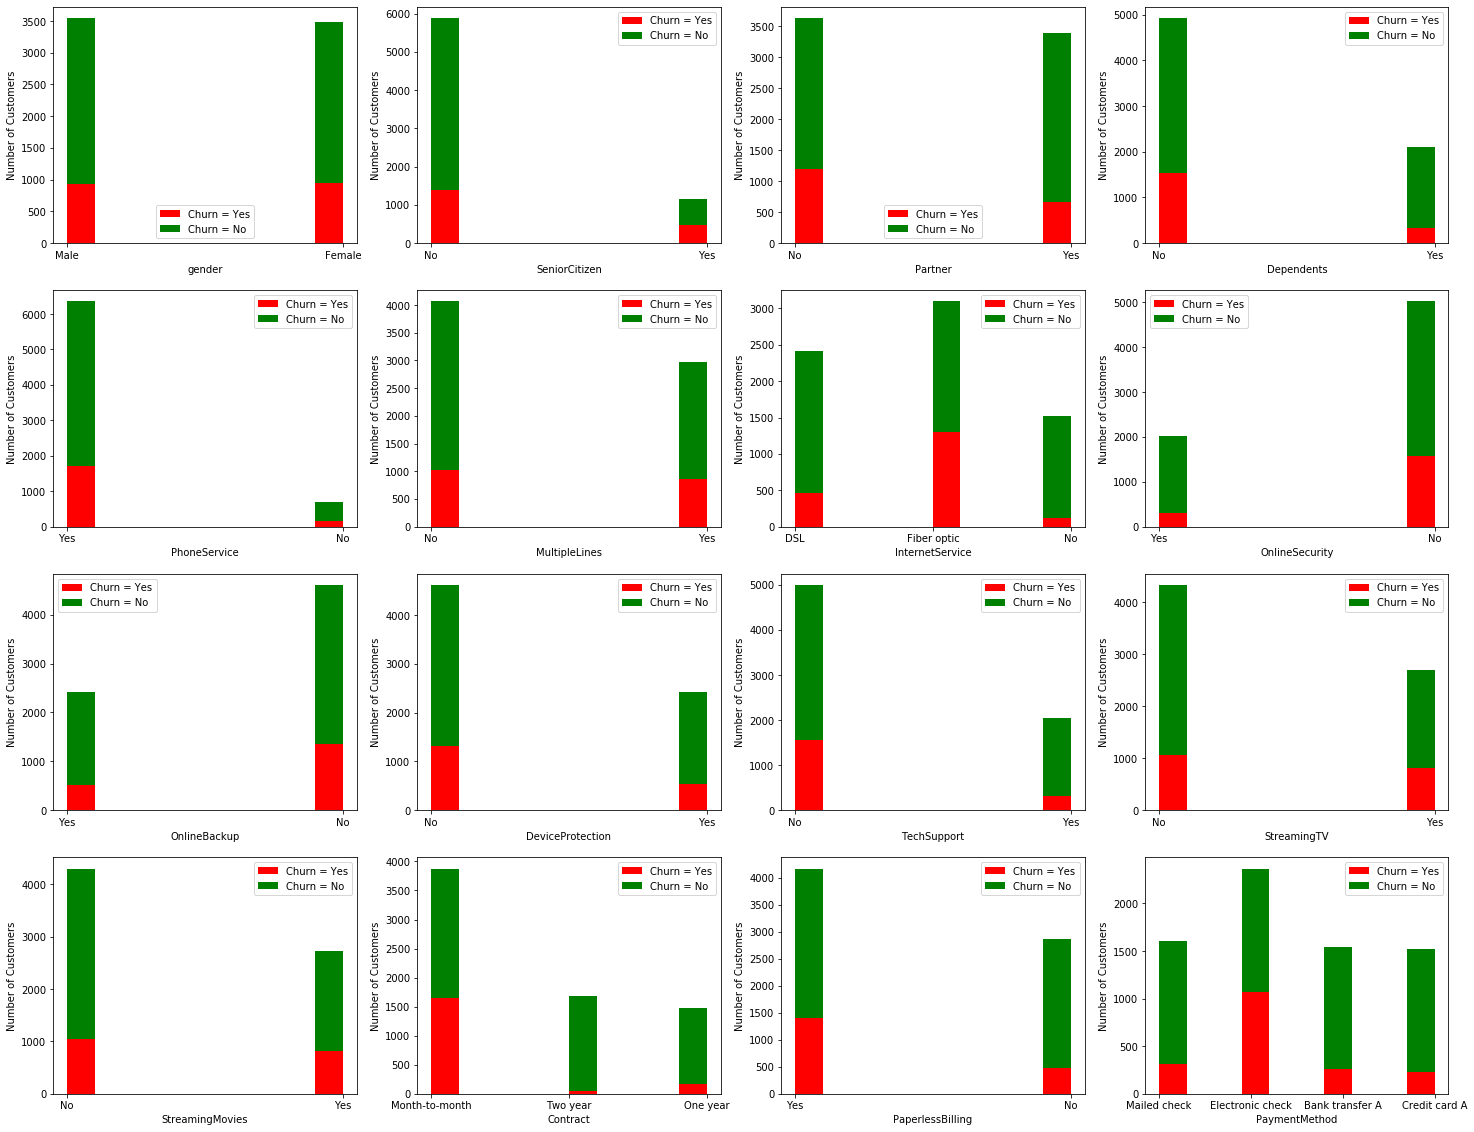

In [15]:
categorical_features = [i for i in data if data[i].dtypes == object]
fig, ax = plt.subplots(4,4, figsize = (25,20))
for i , x in enumerate(categorical_features[:-1]):
    ax[i//4,i%4].hist(x = [data[data['Churn']=='Yes'][x],data[data['Churn']=='No'][x]],
               stacked=True, color = ['r','g'],
                      label = ['Churn = Yes','Churn = No'])
    ax[i//4,i%4].set(xlabel=x,ylabel='Number of Customers')
    ax[i//4,i%4].legend()    

<b> Customers are more likely to Churn if they: </b>
- Are Senior Citizen
- Have no partner
- Not Dependents
- Are using Optical Fiber Internet Service
- Have no online Security, Online Backup, Device Protection and Tech Support
- Have Month-to-month contract 
- Have Paperless billing
- Pay by electronic check


#### The percentage of categorical features for churn

In [16]:
# The function determines 
def feature_churn_percentage(x):
    return [(data[x].unique()[i],
             round(data[(data.Churn =='Yes') & (data[x] == data[x].unique()[i])][x].count()
                   /data[(data[x] == data[x].unique()[i])][x].count() * 100,3))
            for i in range(0,data[x].nunique())]

for x in categorical_features[:-1]:
    print(f'{x}: {feature_churn_percentage(x)}')

gender: [('Female', 26.96), ('Male', 26.205)]
SeniorCitizen: [('No', 23.65), ('Yes', 41.681)]
Partner: [('Yes', 19.717), ('No', 32.976)]
Dependents: [('No', 31.279), ('Yes', 15.531)]
PhoneService: [('No', 25.0), ('Yes', 26.747)]
MultipleLines: [('No', 25.068), ('Yes', 28.648)]
InternetService: [('DSL', 18.998), ('Fiber optic', 41.893), ('No', 7.434)]
OnlineSecurity: [('No', 31.373), ('Yes', 14.64)]
OnlineBackup: [('Yes', 21.567), ('No', 29.216)]
DeviceProtection: [('No', 28.695), ('Yes', 22.539)]
TechSupport: [('No', 31.23), ('Yes', 15.196)]
StreamingTV: [('No', 24.371), ('Yes', 30.115)]
StreamingMovies: [('No', 24.436), ('Yes', 29.952)]
Contract: [('Month-to-month', 42.71), ('One year', 11.277), ('Two year', 2.849)]
PaperlessBilling: [('Yes', 33.589), ('No', 16.376)]
PaymentMethod: [('Electronic check', 45.285), ('Mailed check', 19.202), ('Bank transfer A', 16.732), ('Credit card A', 15.253)]


The percentage of female and male churn is almost the same. There is a significant likelihood of churn if a customer is a senior citizen. Fiber optical internet service, month-to-month contract, and payment by electronic check are the features likely to churn. However, it is more important to see the contribution of features to the total churn.

#### Percentage of the contribution of features  to the total churn

In [17]:
def total_churn_percentage(x):
    return [(data[x].unique()[i],
             round(data[(data.Churn =='Yes') & (data[x] == data[x].unique()[i])][x].count()
                   /data[x].count() * 100,2))
            for i in range(0,data[x].nunique())]

for x in categorical_features[:-1]:
    print(f'{x}: {total_churn_percentage(x)}')

gender: [('Female', 13.35), ('Male', 13.23)]
SeniorCitizen: [('No', 19.81), ('Yes', 6.77)]
Partner: [('Yes', 9.51), ('No', 17.06)]
Dependents: [('No', 21.94), ('Yes', 4.64)]
PhoneService: [('No', 2.42), ('Yes', 24.16)]
MultipleLines: [('No', 14.49), ('Yes', 12.09)]
InternetService: [('DSL', 6.53), ('Fiber optic', 18.44), ('No', 1.61)]
OnlineSecurity: [('No', 22.38), ('Yes', 4.2)]
OnlineBackup: [('Yes', 7.44), ('No', 19.14)]
DeviceProtection: [('No', 18.83), ('Yes', 7.75)]
TechSupport: [('No', 22.17), ('Yes', 4.41)]
StreamingTV: [('No', 15.0), ('Yes', 11.58)]
StreamingMovies: [('No', 14.95), ('Yes', 11.63)]
Contract: [('Month-to-month', 23.54), ('One year', 2.36), ('Two year', 0.68)]
PaperlessBilling: [('Yes', 19.91), ('No', 6.67)]
PaymentMethod: [('Electronic check', 15.23), ('Mailed check', 4.38), ('Bank transfer A', 3.67), ('Credit card A', 3.3)]


Even though 41.7% of senior citizens are not loyal and prefer to leave, they are only 6.7% towards total churn. The majority of non-senior citizens prefer to stay but still far more in numbers 19.81% of total churn. Customers with month-to-month contracts are the most likely to churn.

#### Visualizing all features on the same scale to get the sense of the dominance of a particular feature 

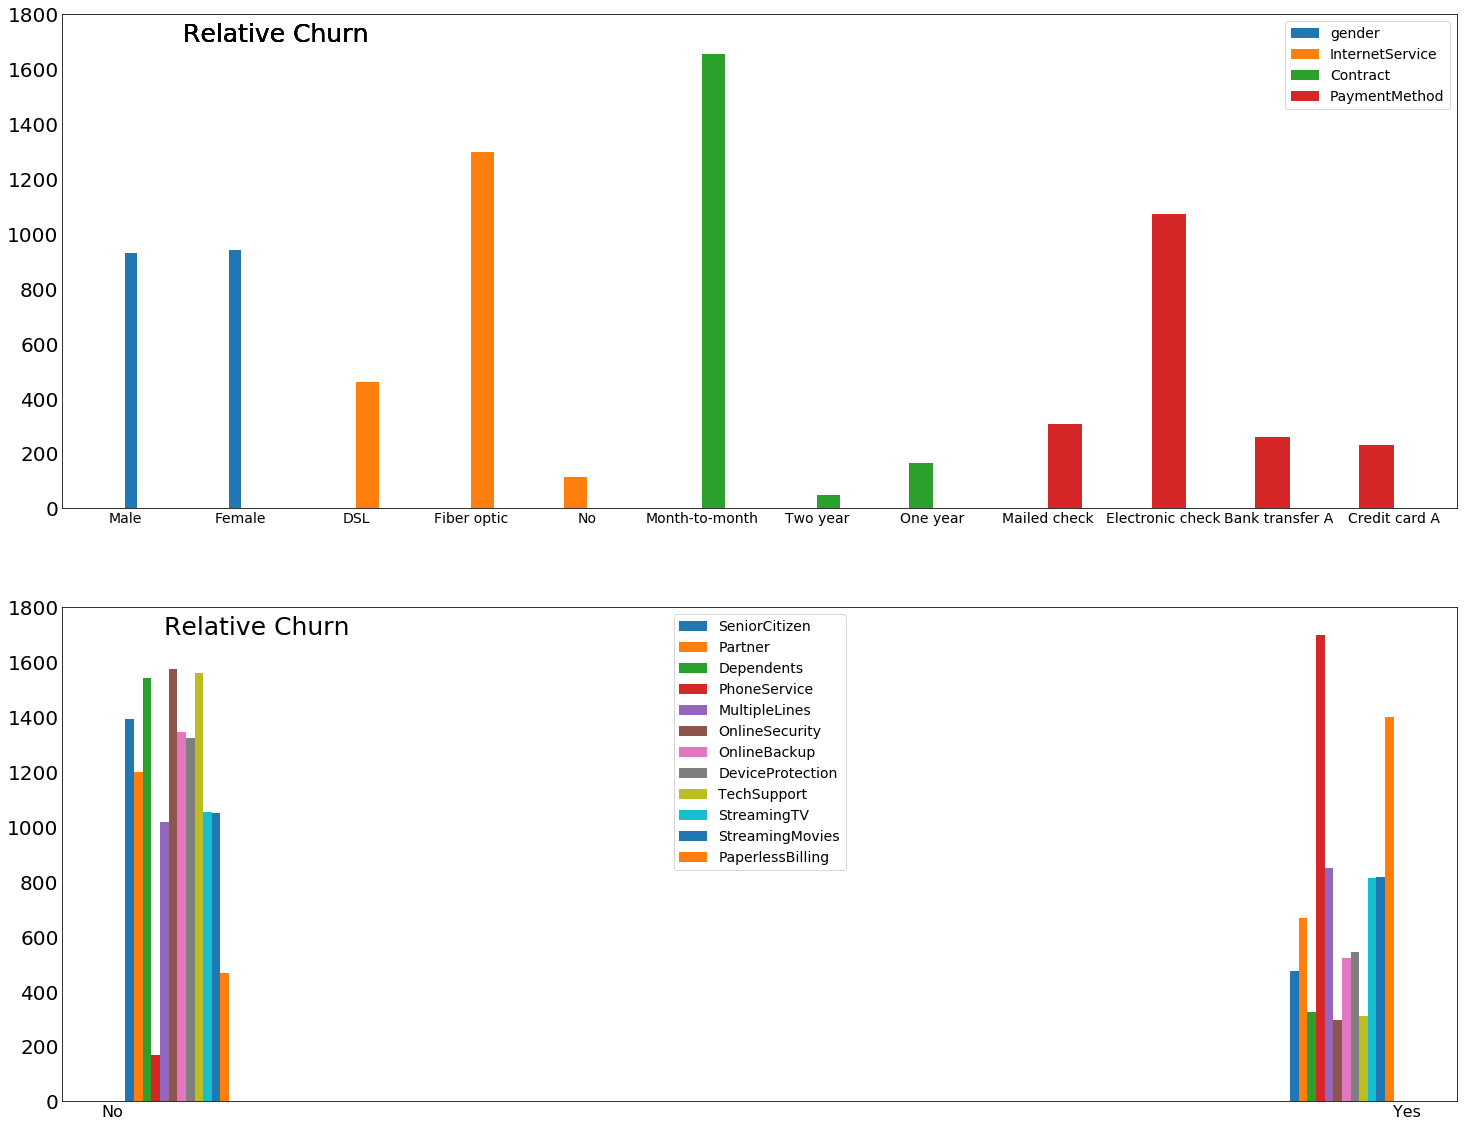

In [18]:
categorical_features = [i for i in data if data[i].dtypes == object]
fig, ax = plt.subplots(2,1,figsize = (25,20))
for x in categorical_features[:-1]:
    if data[x].unique()[0] not in ['Yes', 'No']:
        ax[0].hist(x = data[data['Churn']=='Yes'][x],label = [x])
        ax[0].set_ylim(0,1800) 
        ax[0].xaxis.set_tick_params(length=0,labelsize = 14)
        ax[0].yaxis.set_tick_params(length=0,labelsize = 20)
        ax[0].text(0.5,1700, 'Relative Churn', size = 25)
        ax[0].legend(fontsize = 14, loc = 0)



ax[1].hist(x = [data[data['Churn']=='Yes'][i] for i in categorical_features[:-1] 
                if data[i].unique()[0] in ['Yes', 'No']], 
           label = [i for i in categorical_features[:-1] if data[i].unique()[0] 
                    in ['Yes', 'No']])
ax[1].set_ylim(0,1800)
ax[1].xaxis.set_tick_params(length=0,labelsize = 16)
ax[1].yaxis.set_tick_params(length=0,labelsize = 20)
ax[1].text(0.04,1700, 'Relative Churn', size = 25)
ax[1].legend(fontsize = 14, loc = 9)

## Building Churn Prediction Model

#### Data Preparation

In [19]:
# Changing Catergorial data into Numerical Values of 0 and 1 to build churn model
# Gender, Partner, Dependents, PhoneService, PaperlessBilling, PaymentMethod, Churn
features = ["SeniorCitizen","Partner", "Dependents", "PhoneService", "MultipleLines",
            "OnlineSecurity", "OnlineBackup", "DeviceProtection","TechSupport",
            "StreamingTV","StreamingMovies", "PaperlessBilling", "Churn"]

for column in features:
    data[column] = data[column].map({'Yes': 1, "No": 0})
data["gender"] = data["gender"].map({'Female': 1, 'Male': 0})

In [20]:
# InternetService, Contract, PaymentMethod are still object and have 3 or more unique values.
data = pd.get_dummies(data=data,columns=['InternetService','Contract',
                                         'PaymentMethod'])

In [21]:
# Looking at the data,
data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer A,PaymentMethod_Credit card A,PaymentMethod_Electronic check,PaymentMethod_Mailed check
5908,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6878,1,0,0,0,6,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6544,1,1,0,0,42,1,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0


#### Scaling data, and train and test split

In [22]:
# Scaling data 
import sklearn
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(
    data[['tenure','MonthlyCharges','TotalCharges']])

In [23]:
# Features data
X = data.drop('Churn', axis = 1)
# target
y = data['Churn']
# train and test split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,y,test_size=0.20,random_state=101)

### RANDOM FOREST MODEL

In [24]:
from sklearn.ensemble import RandomForestClassifier

random_classifier= RandomForestClassifier()
random_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### random forest model predictions

In [25]:
y_pred= random_classifier.predict(X_test)

#### Performance of the model: Classification report and Confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1052
           1       0.60      0.49      0.54       355

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



Text(91.68, 0.5, 'Predicted label')

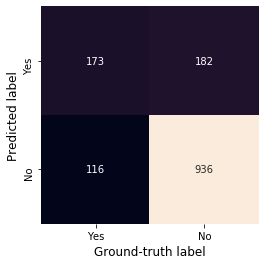

In [27]:
#Confusion Matrix to asses the peformance of the classifier
import numpy

confusion_rfm = confusion_matrix(y_test, y_pred)
sns.heatmap(numpy.flip(confusion_rfm), square=True, annot=True, fmt='d', 
            cbar=False,xticklabels=['Yes','No'], yticklabels=['Yes', 'No'] )
plt.xlabel('Ground-truth label',fontsize = 12)
plt.ylabel('Predicted label',fontsize = 12)

#### Features importance

In [28]:
feature_imp= pd.Series(random_classifier.feature_importances_,index=X.columns)
feature_imp.sort_values(ascending=False)

TotalCharges                      0.191232
MonthlyCharges                    0.168943
tenure                            0.152469
Contract_Month-to-month           0.071749
InternetService_Fiber optic       0.039749
PaymentMethod_Electronic check    0.032762
gender                            0.027157
PaperlessBilling                  0.025230
Contract_Two year                 0.023481
OnlineSecurity                    0.022008
Partner                           0.021783
SeniorCitizen                     0.021418
TechSupport                       0.020268
OnlineBackup                      0.019609
Dependents                        0.019220
MultipleLines                     0.018252
DeviceProtection                  0.018095
StreamingMovies                   0.017338
StreamingTV                       0.016917
InternetService_No                0.012285
PaymentMethod_Credit card A       0.011985
PaymentMethod_Bank transfer A     0.011425
PaymentMethod_Mailed check        0.011267
InternetSer

## Neural network

In [29]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape=(26,), activation="relu"), 
    tf.keras.layers.Dense(32, activation="relu"), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])    

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, verbose = 0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                432       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,009
Trainable params: 1,009
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.evaluate(X_test,y_test)

1407/1407 [==============================] - 0s 48us/sample - loss: 0.4489 - accuracy: 0.7982


[0.4488515585512664, 0.7981521]

In [31]:
y_pred = model.predict(X_test)
# Converting probabilities into labels 0 and 1
pred = [1 if i >= 0.5 else 0 for i in y_pred]

#### Performance of the model: Classification report and Confusion matrix

In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1052
           1       0.61      0.54      0.57       355

    accuracy                           0.80      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



Text(91.68, 0.5, 'Predicted label')

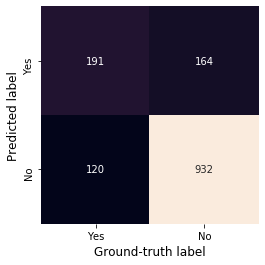

In [34]:
# Confusion Matrix
confusion_nn = tf.math.confusion_matrix(labels=y_test, predictions=pred)
sns.heatmap(numpy.flip(confusion_nn),square=True,annot=True,fmt='d',
           cbar=False,xticklabels=['Yes','No'], yticklabels=['Yes','No'])
plt.xlabel("Ground-truth label",fontsize = 12)
plt.ylabel("Predicted label",fontsize = 12)

Using the above neural network and random forest model, we can estimate the Telco customer churn.